# Kaggle Competition for House Prices

In [1]:
#importing libraries

import pandas as pd 
import numpy as np 
import matplotlib as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1459, 80)

In [4]:
df.shape

(1460, 81)

## Data fields

brief version of eah row.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Cleaning data

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

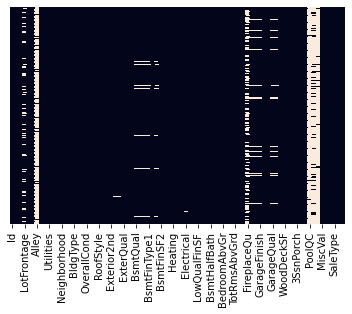

In [6]:
# checking the null values 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# going line by line or column by column and in both the dfs

df["LotFrontage"] = df["LotFrontage"].fillna(df['LotFrontage'].mean()) 

In [9]:
# mszoning has null values here which are not in train df
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
# dropping alley column coz its having many null values 
df.drop(['Alley'], axis=1, inplace=True)

In [11]:
#going feature by feature and filling those categorical values with mode and the columns having more than 70 to 80% null values dropping it 
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [13]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'], axis=1, inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

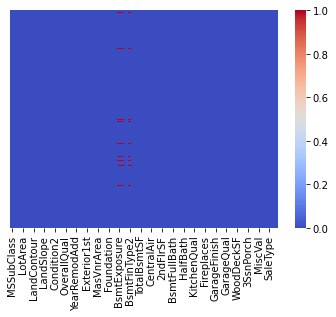

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='coolwarm')

In [20]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

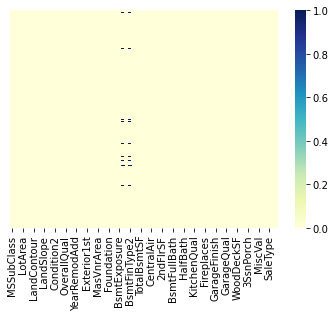

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='YlGnBu')

In [22]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Handle categorical features

In [26]:
# test data has less categories than the train df, so will combine this two dfs to have proper and same categoreis 

In [27]:
columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
          'Condition2', 'BldgType', 'Condition1', 'HouseStyle', 'SaleType', 'SaleCondition', 'ExterCond', 'ExterQual',
          'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl',
           'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
           'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    
    df_final = final_df
    i = 0
    
    for fields in multcolumns:
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        final_df.drop([fields], axis=1, inplace=True)
        
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)
        
        i += 1
    
    df_final = pd.concat([final_df, df_final], axis=1)
    
    return df_final

In [30]:
main_df = df.copy()

In [31]:
# combining test data
test_df = pd.read_csv('formulatedtest.csv')

In [32]:
test_df.shape

(1459, 74)

In [33]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
final_df = pd.concat([df, test_df], axis=0)

In [35]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [36]:
final_df.shape

(2881, 75)

In [37]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
final_df.shape

(2881, 235)

In [39]:
#removing duplicates
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2881, 175)

In [41]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [42]:
#converting it into train and test df 
df_Train = final_df.iloc[:1422, :]
df_Test = final_df.iloc[1422:, :]

In [43]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [44]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_Train.shape

(1422, 175)

In [46]:
df_Test.shape

(1459, 175)

In [47]:
df_Test.drop(['SalePrice'], axis=1, inplace=True)

/Users/ziiv/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 174 entries, MSSubClass to P
dtypes: float64(10), int64(25), uint8(139)
memory usage: 608.4 KB


In [56]:
X_train = df_Train.drop(['SalePrice'], axis=1)
y_train = df_Train['SalePrice']

## Prediction and selecting algorithm 

In [50]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [57]:
import xgboost as xgb
classifier = xgb.XGBRegressor()
classifier.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
import pickle 
filename = 'finalized_model_pk1'
pickle.dump(classifier, open(filename, 'wb'))

In [59]:
y_pred = classifier.predict(df_Test)

In [60]:
y_pred

array([129051.695, 150099.22 , 196159.06 , ..., 169300.45 , 108080.62 ,
       233303.56 ], dtype=float32)

In [62]:
#create sample submission file and submit 

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'Saleprice']
datasets.to_csv('sample_submission1.csv', index=False)

In [52]:
regressor = xgb.XGBRegressor()

In [53]:
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]

In [54]:
#hyperparameter optimization

n_estimators = [100, 500, 900, 1100, 1500] #level of decision tree
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]

#defining the grid of hyperparameters to search 
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}

In [64]:
#seting up random search with 4-fold cross validation 

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=hyperparameter_grid, cv=5, n_iter=50,
                               scoring = 'neg_mean_absolute_error', n_jobs=4, verbose=5, return_train_score = True, 
                            random_state=42)

In [65]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [66]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
regressor = xgb.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, 
                             colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain', 
                             interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
import pickle
filename = 'finalized_model_pk1'
pickle.dump(classifier, open(filename, 'wb'))

In [71]:
y_pred = regressor.predict(df_Test)

In [72]:
y_pred

array([117275.625, 163568.39 , 188306.14 , ..., 181178.69 , 115435.21 ,
       236526.36 ], dtype=float32)

In [74]:
# creating sample submission file

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission2.csv', index=False)

# Artificial Neural Network 

In [109]:
pred.columns = ["Saleprice"]

In [112]:
temp_df = df_Train['SalePrice'].copy()

In [113]:
temp_df.column=['SalePrice']

In [115]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

/Users/ziiv/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [116]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [117]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [118]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [119]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [120]:
df_Train.shape

(2881, 176)

In [121]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [138]:
X_train.shape

(2881, 175)

In [125]:
from tensorflow.keras import backend as K
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [133]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 175))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
231/231 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/1000
231/231 [================

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 86/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 87/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 88/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 89/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 90/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 91/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 92/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 93/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 94/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 95/1000
231/231 [=====================

Epoch 169/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 170/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 171/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 172/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 173/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 174/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 175/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 176/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 177/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 178/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 179/1000
231/2

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 253/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 254/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 255/1000
231/231 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 256/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 257/1000
231/231 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 258/1000
231/231 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 259/1000
231/231 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 260/1000
231/231 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 261/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 262/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 336/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 337/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 338/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 339/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 340/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 341/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 342/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 343/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 344/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 345/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 419/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 420/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 421/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 422/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 423/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 424/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 425/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 426/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 427/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 428/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 502/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 503/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 504/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 505/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 506/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 507/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 508/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 509/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 510/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 511/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 585/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 586/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 587/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 588/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 589/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 590/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 591/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 592/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 593/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 594/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 668/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 669/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 670/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 671/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 672/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 673/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 674/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 675/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 676/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 677/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 751/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 752/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 753/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 754/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 755/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 756/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 757/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 758/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 759/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 760/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 834/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 835/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 836/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 837/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 838/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 839/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 840/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 841/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 842/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 843/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 917/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 918/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 919/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 920/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 921/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 922/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 923/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 924/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 925/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 926/1000
231/231 [===========

231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 1000/1000
231/231 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan


In [137]:
ann_pred = classifier.predict(df_Test)
ann_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [107]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission3.csv',index=False)